<h1 align="center"> *Анализ социальных сетей* </h1>

# PZ-2 Степенные законы распределения

## Для подготовки к занятию следует изучить материал, представленный в папке "Cтепенной закон"
Задачи практического занятия:
    - построение графа социальной сети по данных из dataset
    - построение графика распределения степеней вершин графа
    - построение графика распределения степеней вершин графа в двойных логарифмических координатах
    - определение параметра распределения степеней вершин графа
    - применение теста Колмогорова-Смирнова для сравнения экспериментальных данных с теоретическими 

## Задание на практическое занятие №2 (Степенной закон)
Файл для работы "facebook_combined.txt".

Уточнение задач:
- построение графа социальной сети по данных из dataset;
- построение графиков распределения степеней вершин графа для трёх способов представления данных: частотного, рангового, кумулятивного;
- построение графика распределения степеней вершин графа в двойных логарифмических координатах для трёх способов представления данных;
- определение параметра распределения степеней вершин графа для всех трёх видов распределений;
- применение теста Колмогорова-Смирнова для сравнения экспериментальных данных с теоретическими (для трёх графиков).

Результаты работы представить в формате .ipynb. В файле ОБЯЗАТЕЛЬНО должны присутствовать комментарии, поясняющие смысл действий, выполняемых в каждой ячейке. 

| character | description           |
|-----------|-----------------------|
| '-'       | solid line style      |
| '--'      | dashed line style     |
| '-.'      | dash-dot line style   |
| ':'       | dotted line style     |
| '.'       | point marker          |
| ','       | pixel marker          |
| 'o'       | circle marker         |
| 'v'       | triangle_down marker  |
| '^'       | triangle_up marker    |
| '<'       | triangle_left marker  |
| '>'       | triangle_right marker |
| '1'       | tri_down marker       |
| '2'       | tri_up marker         |
| '3'       | tri_left marker       |
| '4'       | tri_right marker      |
| 's'       | square marker         |
| 'p'       | pentagon marker       |
| '*'       | star marker           |
| 'h'       | hexagon1 marker       |
| 'H'       | hexagon2 marker       |
| '+'       | plus marker           |
| 'x'       | x marker              |
| 'D'       | diamond marker        |
| 'd'       | thin_diamond marker   |
| '\|'      | vline marker          |
| '_'       | hline marker          |

In [1]:
import pandas as pd
import networkx as nx
from matplotlib import pylab as plt
import numpy as np
from scipy import stats
from scipy.stats import ks_2samp
import random

def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, width=weights);
    else:
        nx.draw_networkx(G, pos);
        
def plot_chart(title="", x="", y="", log=False, *charts):
    plt.figure(figsize=(8,6))
    plt.tight_layout()
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid()
    if log == True:
        plt.xscale("log")
        plt.yscale("log")
    for one_chart in charts:   
        plt.plot(*one_chart["matrix"], one_chart["character"])

In [2]:
with open("facebook_combined.txt", 'r') as open_file:
    buff = list(map(str.split, open_file.read().split('\n')))[:-1]

In [3]:
def generate_graph(raw_data):
    G = nx.Graph()
    for nodes in raw_data:
        G.add_edge(*nodes)
    return G

G = generate_graph(buff)
# plot_graph(G)

In [4]:
from collections import Counter

degrees = list(dict(G.degree()).values())
data_frequency = sorted([(degree, frequency) for degree, frequency in dict(Counter(degrees)).items()], key=lambda x: x[1])
all_data = list(filter(lambda x: x[1] not in [], data_frequency))
data_rank = [(index, x[0]) for index, x in enumerate(sorted(all_data, key=lambda x: x[0])[::-1])]

<Figure size 432x288 with 0 Axes>

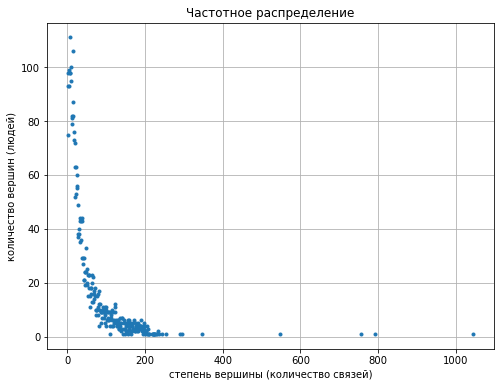

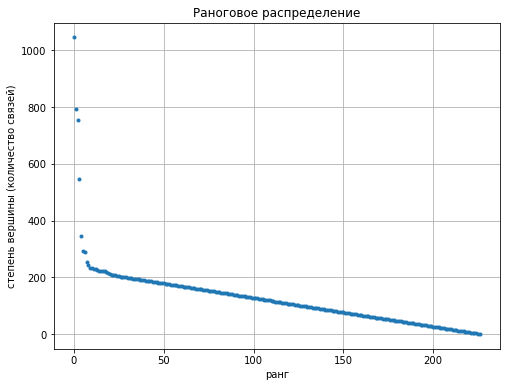

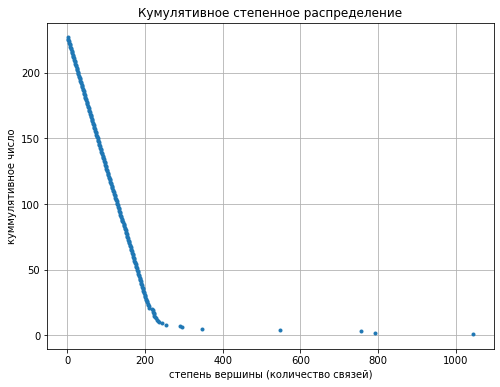

In [5]:
fig = plt.figure()

# 1 graph
plot_chart("Частотное распределение", "степень вершины (количество связей)", "количество вершин (людей)", False,
           {"matrix": [[x[0] for x in all_data], [x[1] for x in all_data]], "character": '.'})

# 2 graph
plot_chart("Раноговое распределение", "ранг", "степень вершины (количество связей)", False,
           {"matrix": [[x[0] for x in data_rank], [x[1] for x in data_rank]], "character": '.'})

# 3 graph
plot_chart("Кумулятивное степенное распределение", "степень вершины (количество связей)", "куммулятивное число", False,
           {"matrix": [[x[1] for x in data_rank], [len(list(filter(lambda y: y[1] >= x[1], data_rank))) for x in data_rank]], "character": '.'})

plt.show()

<Figure size 432x288 with 0 Axes>

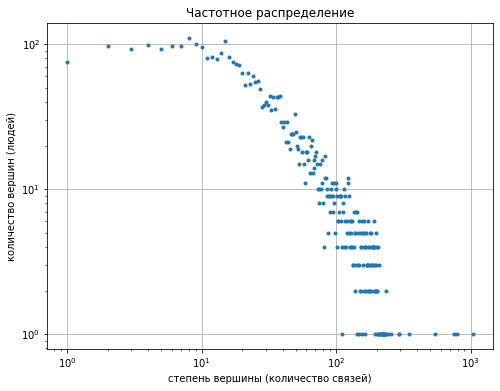

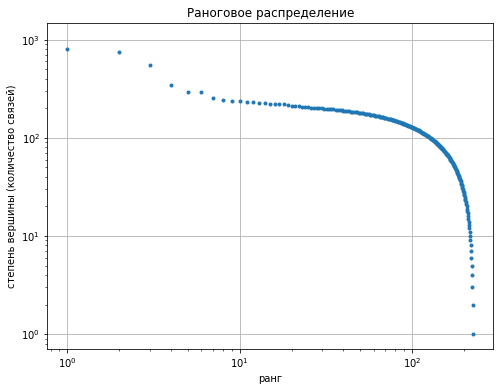

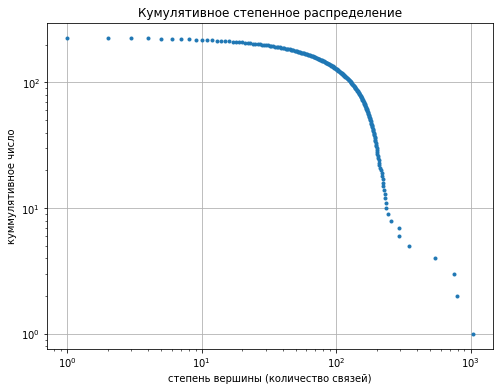

In [7]:
fig = plt.figure()

# 1 graph
plot_chart("Частотное распределение", "степень вершины (количество связей)", "количество вершин (людей)", True,
           {"matrix": [[x[0] for x in all_data], [x[1] for x in all_data]], "character": '.'})

# 2 graph
plot_chart("Раноговое распределение", "ранг", "степень вершины (количество связей)", True,
           {"matrix": [[x[0] for x in data_rank], [x[1] for x in data_rank]], "character": '.'})

# 3 graph
plot_chart("Кумулятивное степенное распределение", "степень вершины (количество связей)", "куммулятивное число", True,
           {"matrix": [[x[1] for x in data_rank], [len(list(filter(lambda y: y[1] >= x[1], data_rank))) for x in data_rank]], "character": '.'})

plt.show()

k=-1.2521334863022893 b=3.4390189351250164


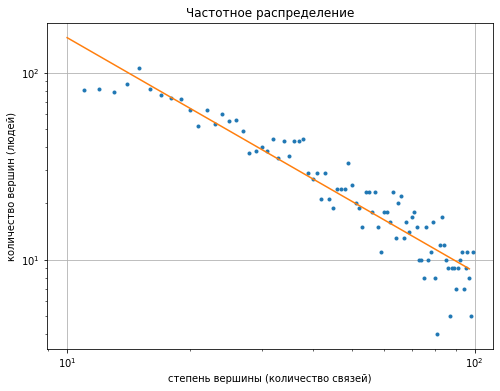

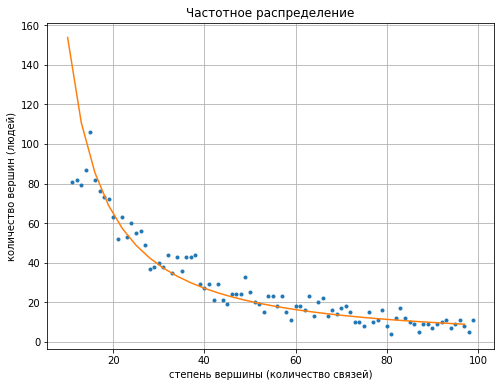

In [140]:
buff = list(filter(lambda z: z[0] < 100 and z[0] > 10, zip([x[0] for x in all_data], [x[1] for x in all_data])))

x = [np.log10(z[0]) for z in buff]
y = [np.log10(z[1]) for z in buff]
slope_frequency, intercept_frequency, r_value, p_value, std_err = stats.linregress(x, y)
print(f'k={slope_frequency} b={intercept_frequency}')

plot_chart("Частотное распределение", "степень вершины (количество связей)", "количество вершин (людей)", True,
           {"matrix": [[z[0] for z in buff], [z[1] for z in buff]], "character": '.'},
           {"matrix": [np.arange(10, 100, 3), np.vectorize(lambda z: z**slope_frequency * 10**intercept_frequency)(np.arange(10, 100, 3))], "character": '-'})

plot_chart("Частотное распределение", "степень вершины (количество связей)", "количество вершин (людей)", False,
           {"matrix": [[z[0] for z in buff], [z[1] for z in buff]], "character": '.'},
           {"matrix": [np.arange(10, 100, 3), np.vectorize(lambda z: z**slope_frequency * 10**intercept_frequency)(np.arange(10, 100, 3))], "character": '-'})

k=-3.5966719292610296 b=9.701444006704728


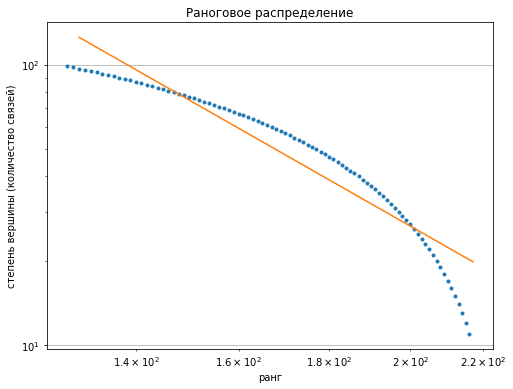

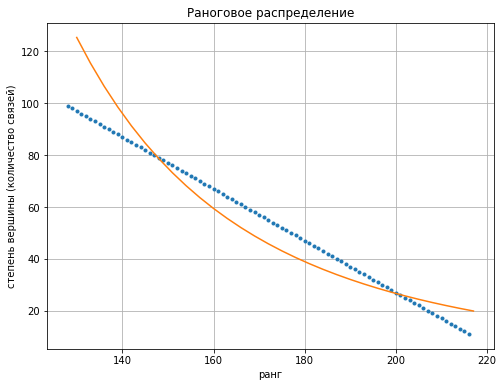

In [146]:
buff = list(filter(lambda z: z[1] < 100 and z[1] > 10, zip([x[0] for x in data_rank], [x[1] for x in data_rank])))
x = [np.log10(z[0]) for z in buff]
y = [np.log10(z[1]) for z in buff]

slope_rang, intercept_rang, r_value, p_value, std_err = stats.linregress(x, y)
print(f'k={slope_rang} b={intercept_rang}')

plot_chart("Раноговое распределение", "ранг", "степень вершины (количество связей)", True,
           {"matrix": [[z[0] for z in buff], [z[1] for z in buff]], "character": '.'},
           {"matrix": [np.arange(130, 220, 3), np.vectorize(lambda z: z**slope_rang * 10**intercept_rang)(np.arange(130, 220, 3))], "character": '-'})

plot_chart("Раноговое распределение", "ранг", "степень вершины (количество связей)", False,
           {"matrix": [[z[0] for z in buff], [z[1] for z in buff]], "character": '.'},
           {"matrix": [np.arange(130, 220, 3), np.vectorize(lambda z: z**slope_rang * 10**intercept_rang)(np.arange(130, 220, 3))], "character": '-'})

In [147]:
print(slope_frequency, 1/slope_rang-1)

-1.2521334863022893 -1.2780348109774526


k=-0.24744915597884734 b=2.6485688100651013


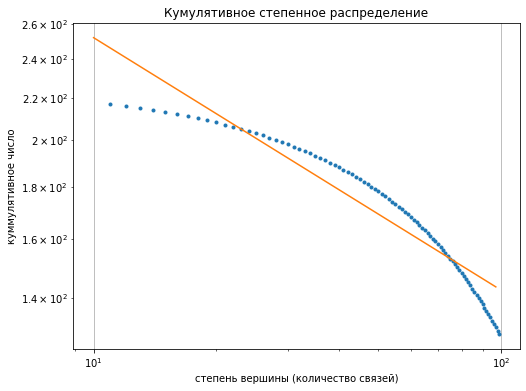

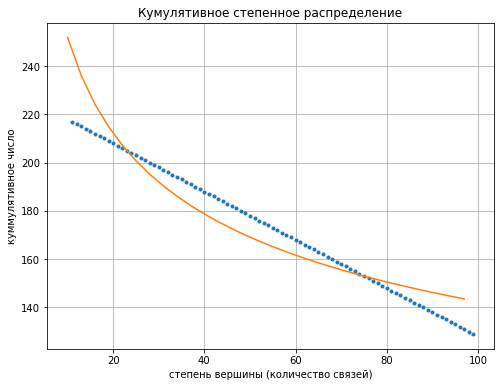

In [148]:
buff = list(filter(lambda z: z[0] < 100 and z[0] > 10, zip([x[1] for x in data_rank], [len(list(filter(lambda y: y[1] >= x[1], data_rank))) for x in data_rank])))

x = [np.log10(z[0]) for z in buff]
y = [np.log10(z[1]) for z in buff]
slope_cum, intercept_cum, r_value, p_value, std_err = stats.linregress(x, y)
print(f'k={slope_cum} b={intercept_cum}')

plot_chart("Кумулятивное степенное распределение", "степень вершины (количество связей)", "куммулятивное число", True, 
           {"matrix": [[z[0] for z in buff], [z[1] for z in buff]], "character": '.'},
           {"matrix": [np.arange(10, 100, 3), np.vectorize(lambda z: z**slope_cum * 10**intercept_cum)(np.arange(10, 100, 3))], "character": '-'})

plot_chart("Кумулятивное степенное распределение", "степень вершины (количество связей)", "куммулятивное число", False, 
           {"matrix": [[z[0] for z in buff], [z[1] for z in buff]], "character": '.'},
           {"matrix": [np.arange(10, 100, 3), np.vectorize(lambda z: z**slope_cum * 10**intercept_cum)(np.arange(10, 100, 3))], "character": '-'})

In [149]:
print(slope_rang, 1/slope_cum)

-3.5966719292610296 -4.04123423272247


Ks_2sampResult(statistic=0.09, pvalue=0.39352743357720954)


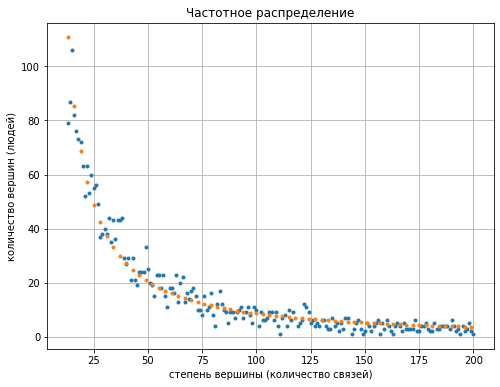

In [213]:
bleach_data = list(filter(lambda x: x[0] <= 200 and x[0] >= 13, all_data))
np.random.seed(12345678)
x = [random.choices([x[0] for x in bleach_data], weights=[x[1] for x in bleach_data])[0] for _ in range(200)]
y = [random.choices(np.arange(13, 200, 3), weights=np.vectorize(lambda z: z**slope_frequency * 10**intercept_frequency)(np.arange(13, 200, 3)))[0] for _ in range(200)]
print(ks_2samp(x, y))

plot_chart("Частотное распределение", "степень вершины (количество связей)", "количество вершин (людей)", False,
           {"matrix": [[x[0] for x in bleach_data], [x[1] for x in bleach_data]], "character": '.'},
           {"matrix": [np.arange(13, 201, 3), np.vectorize(lambda z: z**slope_frequency * 10**intercept_frequency)(np.arange(13, 201, 3))], "character": '.'})

In [224]:
bleach_data = list(filter(lambda x: x[0] <= 200 and x[0] >= 13, data_rank))
bleach_data = data_rank
np.random.seed(12345678)
x = [random.choices([x[0] for x in bleach_data], weights=[x[1] for x in bleach_data])[0] for _ in range(200)]
y = [random.choices(np.arange(13, 200, 3), weights=np.vectorize(lambda z: z**slope_frequency * 10**intercept_frequency)(np.arange(13, 200, 3)))[0] for _ in range(200)]
print(ks_2samp(x, y))

data_rank = [(index, x[0]) for index, x in enumerate(sorted(all_data, key=lambda x: x[0])[::-1])]

plot_chart("Раноговое распределение", "ранг", "степень вершины (количество связей)", False,
           {"matrix": [[x[0] for x in bleach_data], [x[1] for x in bleach_data]], "character": '.'},
           {"matrix": 
            [[(index, x[0]) for index, x in enumerate(sorted(np.arange(13, 201, 3), key=lambda x: x[0])[::-1])], 
             np.vectorize(lambda z: z**slope_frequency * 10**intercept_frequency)(np.arange(13, 201, 3))], "character": '.'})

# plot_chart("Раноговое распределение", "ранг", "степень вершины (количество связей)", False,
#            {"matrix": [[x[0] for x in bleach_data], [x[1] for x in bleach_data]], "character": '.'},
#            {"matrix": 
#             [(index, x[0]) for index, x in enumerate(sorted(np.arange(13, 201, 3), key=lambda x: x[0])[::-1])], 
#             [np.vectorize(lambda z: z**slope_frequency * 10**intercept_frequency)(np.arange(13, 201, 3))], "character": '.'})

Ks_2sampResult(statistic=0.2, pvalue=0.000648608042418048)


IndexError: invalid index to scalar variable.

In [ ]:
bleach_data = list(filter(lambda x: x[0] <= 200 and x[0] >= 13, all_data))
np.random.seed(12345678)
x = [random.choices([x[0] for x in bleach_data], weights=[x[1] for x in bleach_data])[0] for _ in range(200)]
y = [random.choices(np.arange(13, 200, 3), weights=np.vectorize(lambda z: z**slope_frequency * 10**intercept_frequency)(np.arange(13, 200, 3)))[0] for _ in range(200)]
print(ks_2samp(x, y))

plot_chart("Кумулятивное степенное распределение", "степень вершины (количество связей)", "куммулятивное число", False,
           {"matrix": [[x[0] for x in bleach_data], [x[1] for x in bleach_data]], "character": '.'},
           {"matrix": [np.arange(13, 201, 3), np.vectorize(lambda z: z**slope_frequency * 10**intercept_frequency)(np.arange(13, 201, 3))], "character": '.'})

# 3 graph
plot_chart("Кумулятивное степенное распределение", "степень вершины (количество связей)", "куммулятивное число", False,
           {"matrix": [[x[1] for x in data_rank], [len(list(filter(lambda y: y[1] >= x[1], data_rank))) for x in data_rank]], "character": '.